In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
user = "aabounak"
password = "mysecretpassword"
host = "localhost"
port = "5432"
database = "piscineds"

def connect_to_postgres():
  return create_engine(
    url=f"postgresql://{user}:{password}@{host}:{port}/{database}"
  )

In [4]:
engine = connect_to_postgres()

In [5]:
with engine.connect() as connection:
  result = connection.execute(text('select * from customers limit 8500000'))
  data = result.fetchall()

columns_names = result.keys()
df = pd.DataFrame(data, columns=columns_names)
df.head()

,event_time,event_type,product_id,price,user_id,user_session,category_id,category_code,brand
0,2022-12-01 00:37:47+00:00,view,5838656,15.24,557516335,5d652b2d-7f7b-488f-a2a4-73e12c024596,NaN,None,None
1,2022-12-01 00:37:49+00:00,cart,5908215,1.43,356011474,e38133d8-bd17-e4e1-194f-e01d325312db,1.487580e+18,None,None
2,2022-12-01 00:38:08+00:00,view,5861591,2.22,555562373,be19f337-027d-48a8-b394-bc3a76f9a560,NaN,None,None
3,2022-12-01 00:38:13+00:00,cart,5735080,2.38,513026898,2b88b00a-892a-4639-bce4-1ea17a7d6221,1.487580e+18,None,None
4,2022-12-01 00:38:16+00:00,view,5825016,12.84,521485960,f03e66b5-ea1c-4fc5-90c1-42409b2db981,NaN,None,None


In [105]:

df.to_csv(r'./\selected_data.csv')

In [6]:
sns.set_style("darkgrid")

### Exercise 00

<Axes: ylabel='count'>

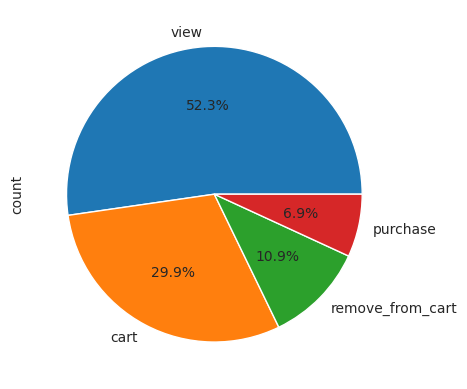

In [7]:
df['event_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Exercise 01

In [8]:
df['event_time'] = pd.to_datetime(df['event_time'])
filtered_data = df[(df['event_type'] == 'purchase')]

In [9]:
filtered_data['year'] = filtered_data['event_time'].dt.year
filtered_data['month'] = filtered_data['event_time'].dt.month
filtered_data['day'] = filtered_data['event_time'].dt.day

/tmp/ipykernel_728/1658810200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = filtered_data['event_time'].dt.year
/tmp/ipykernel_728/1658810200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = filtered_data['event_time'].dt.month
/tmp/ipykernel_728/1658810200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

<Axes: xlabel='Date', ylabel='Number of customers'>

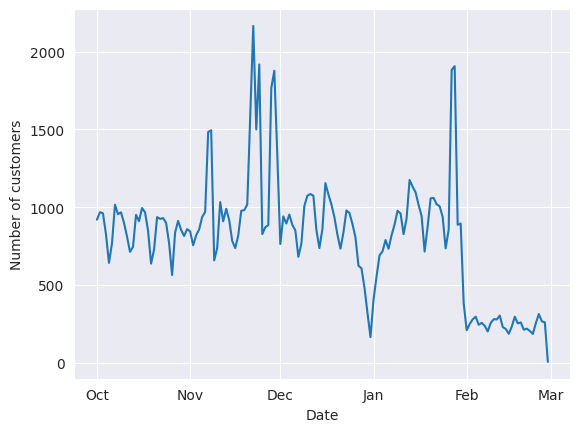

In [10]:
daily_customer_counts = filtered_data.groupby(['year', 'month', 'day'])['user_id'].nunique().reset_index()
daily_customer_counts['date'] = pd.to_datetime(daily_customer_counts[['year', 'month', 'day']].astype(str).agg('-'.join, axis=1))

plt.ylabel('Number of customers')
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

sns.lineplot(data=daily_customer_counts, x='date', y='user_id')

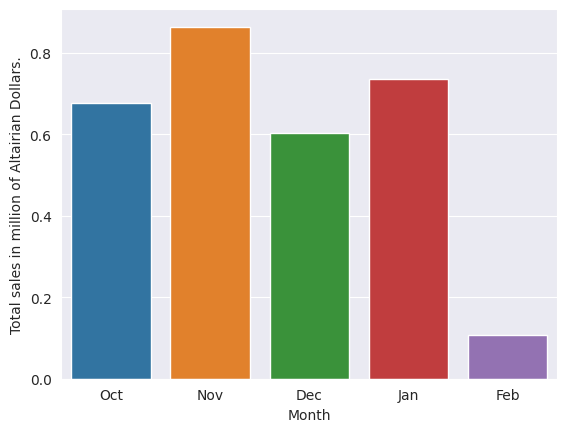

In [11]:
total_sales = filtered_data.groupby(['year', 'month'])['price'].sum().reset_index()
total_sales['date'] = pd.to_datetime(total_sales[['year', 'month']].astype(str).agg('-'.join, axis=1)).dt.strftime('%b')

total_sales['price_in_million'] = total_sales['price'] / 1000000

sns.barplot(data=total_sales, x='date', y='price_in_million')

plt.xlabel('Month')
plt.ylabel('Total sales in million of Altairian Dollars.')
plt.show()

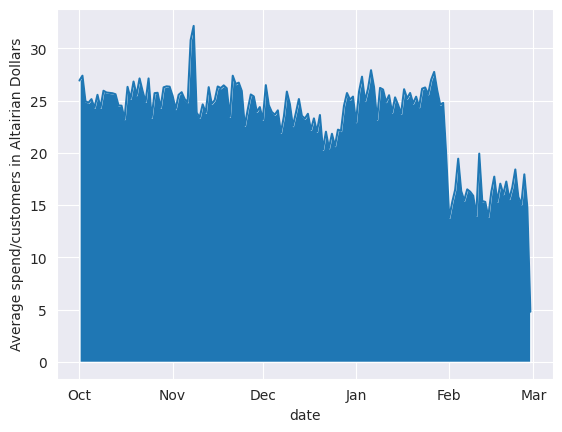

In [12]:
total_sales = filtered_data.groupby(['year', 'month', 'day'])['price'].sum().reset_index()
merged_data = pd.merge(total_sales, daily_customer_counts, on=['year', 'month', 'day'])
merged_data['average_spend_per_customer'] = merged_data['price'] / merged_data['user_id']
merged_data['date'] = pd.to_datetime(merged_data[['year', 'month', 'day']].astype(str).agg('-'.join, axis=1))

sns.lineplot(data=merged_data, x='date', y='average_spend_per_customer')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b')) 
plt.fill_between(merged_data['date'], merged_data['average_spend_per_customer'])
plt.ylabel('Average spend/customers in Altairian Dollars')
plt.show()


### Ex02

count    583817.000000
mean          5.115094
std          10.192499
min         -15.870000
25%           1.430000
50%           3.000000
75%           5.270000
max         327.780000
Name: price, dtype: float64


<Axes: xlabel='price'>

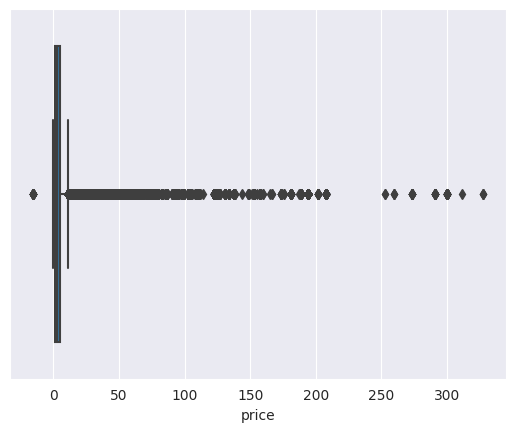

In [13]:
copy_df = filtered_data.copy()
copy_df['price'] = copy_df['price'].astype(float)

print(copy_df['price'].describe())
sns.boxplot(data=copy_df, x='price')

<Axes: xlabel='price'>

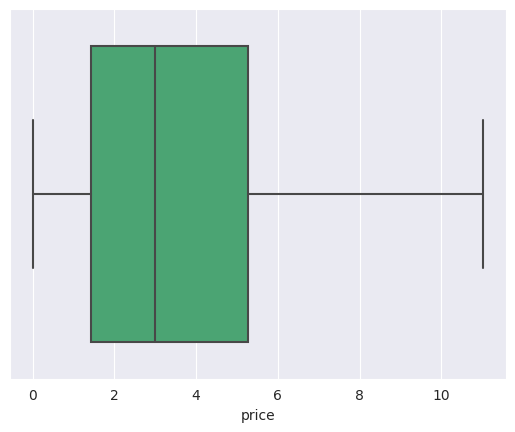

In [14]:
sns.boxplot(data=copy_df, x='price', showfliers=False, color='mediumseagreen')

In [132]:
copy_df.head(10)

,event_time,event_type,product_id,price,user_id,user_session,category_id,category_code,brand,year,month,day
26,2022-12-01 00:43:51+00:00,purchase,5754991,6.19,579950721,f39acf4b-11d5-479d-84a7-04f5bc6255ce,NaN,None,None,2022,12,1
27,2022-12-01 00:43:51+00:00,purchase,5815137,3.97,579950721,f39acf4b-11d5-479d-84a7-04f5bc6255ce,NaN,None,None,2022,12,1
28,2022-12-01 00:43:51+00:00,purchase,8381,15.08,579950721,f39acf4b-11d5-479d-84a7-04f5bc6255ce,1.487580e+18,None,None,2022,12,1
129,2022-12-01 01:15:01+00:00,purchase,36406,3.17,436271415,7fe6b59f-7a31-4e1f-9324-6720360306a4,1.487580e+18,None,None,2022,12,1
130,2022-12-01 01:15:01+00:00,purchase,5803082,3.49,436271415,7fe6b59f-7a31-4e1f-9324-6720360306a4,1.487580e+18,None,None,2022,12,1
131,2022-12-01 01:18:32+00:00,purchase,5899359,4.44,356011474,e38133d8-bd17-e4e1-194f-e01d325312db,NaN,None,None,2022,12,1
132,2022-12-01 01:18:32+00:00,purchase,5907837,1.43,356011474,e38133d8-bd17-e4e1-194f-e01d325312db,1.487580e+18,None,None,2022,12,1
133,2022-12-01 01:18:32+00:00,purchase,5907852,1.43,356011474,e38133d8-bd17-e4e1-194f-e01d325312db,1.487580e+18,None,None,2022,12,1
134,2022-12-01 01:18:32+00:00,purchase,5907871,1.43,356011474,e38133d8-bd17-e4e1-194f-e01d325312db,1.487580e+18,None,None,2022,12,1
135,2022-12-01 01:18:32+00:00,purchase,5908215,1.43,356011474,e38133d8-bd17-e4e1-194f-e01d325312db,1.487580e+18,None,None,2022,12,1


<Axes: xlabel='mean_price'>

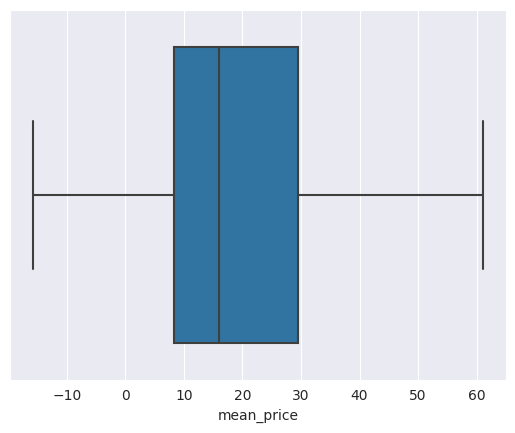

In [150]:
total = copy_df.groupby(['event_time', 'user_id'])['price'].sum().reset_index(name='sum_price')
total = total.groupby(['event_time', 'user_id'])['sum_price'].mean().reset_index(name='mean_price')

sns.boxplot(data=total, x='mean_price', showfliers=False)
# total.head((100))

# copy_df.head(50)

### Ex03